# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




C:\Users\Alex\AppData\Local\Temp\ipykernel_2328\1842324635.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


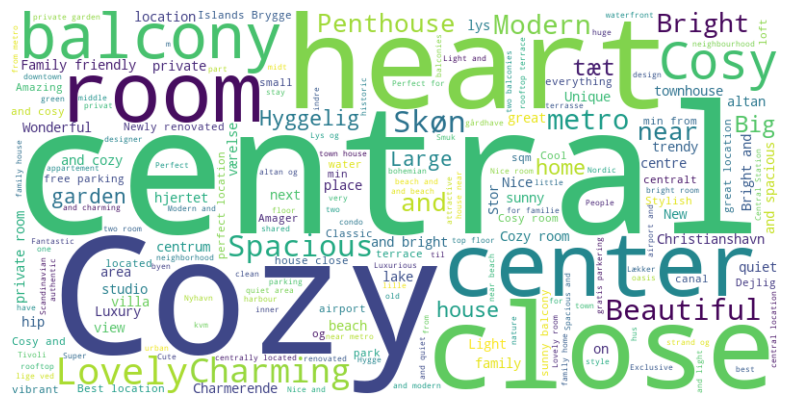

In [2]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

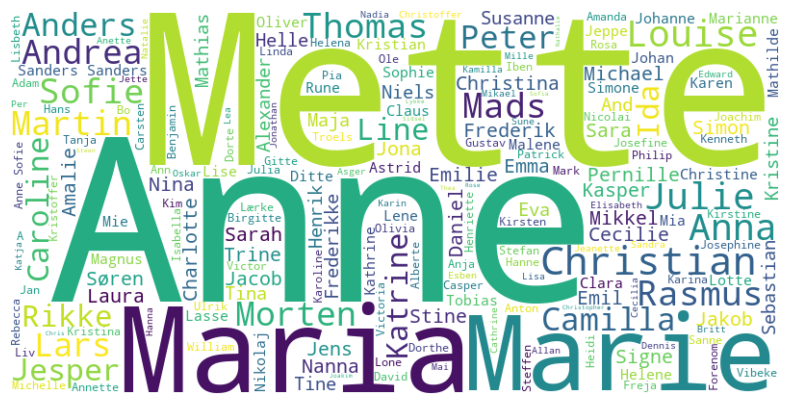

In [2]:
# State your solution here. Add more cells if needed.

#filter non names ??
non_names = ['ApartmentinCopenhagen','This Place', 'place','Into','Denmark','This','Rent A','Og','Rent']

# Convert the ' host_name' column to a single string
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=non_names, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#mostly in line with the name distribution in denmatk and it seem women are more likely to appear as host_names 

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [11]:
#no details
import plotly.express as px

# Your list of latitudes and longitudes
lats = data_filtered['latitude'].values.tolist()
lons = data_filtered['longitude'].values.tolist()
aff =  data_filtered['price_category'].values.tolist()

# Create a DataFrame with your data
df = pd.DataFrame({'latitude': lats, 'longitude': lons, 'affordable':aff})

# Create the scatter plot on a map
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color = 'affordable',
                     projection='natural earth', title='Map of Locations',
                     color_continuous_scale=['blue', 'red'])

# Customize the map (optional)
fig.update_geos(fitbounds='locations',
                resolution=50,
                scope ='europe',
                showlakes=True,
                showrivers=True,
                landcolor='springgreen',
                oceancolor='skyblue',
                lakecolor = 'skyblue',
                bgcolor = 'skyblue',
                projection=dict(type='equirectangular', scale=1)
    )
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

# Show the map
fig.show()

In [4]:
#details but can't handel 13k entries
import folium

# Coordinates for Copenhagen
latitude =  55.676096
longitude =  12.598106

lats = data_filtered['latitude'].values.tolist()
longs = data_filtered['longitude'].values.tolist()

# Create a map centered at Copenhagen
m = folium.Map(location=[latitude, longitude], zoom_start=12)

#add makers for each point 
for i in range(500):
    folium.Marker([lats[i], longs[i]]).add_to(m)

# Display the map
#display(m)

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [5]:
import plotly.express as px
# State your solution here. Add more cells if needed.


average_price_per_neighbourhhood = data_filtered.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

average_review_per_neighourhood = data_filtered.groupby('neighbourhood_cleansed')['reviews_per_month'].mean().reset_index()


room_type_per_neighbourhood = data_filtered.groupby('neighbourhood_cleansed')['room_type'].value_counts().reset_index(name='count')

# Create the bar plot
fig = px.bar(average_price_per_neighbourhhood, x='neighbourhood_cleansed', y='price', title='price in neghbourhoods')

fig_two = px.bar(average_review_per_neighourhood, x='neighbourhood_cleansed', y='reviews_per_month', title='reviews in neghbourhoods')

fig_three =  px.bar(room_type_per_neighbourhood, x='neighbourhood_cleansed', y='count', color='room_type',
             labels={'neighbourhood_cleansed':'Neighbourprooood', 'count':'Count', 'room_type':'Type'},
             title='Room Types Per Neighbourhood')

# Show the plot
fig.show()
fig_two.show()
fig_three.show()


C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

<h3>Analisys</h3>
<p>
From the data we can obsereve that the 'Indre By ' neighbourhood is the most expensive on average with a median price of 1570 dkk and from the number of reviews we can assume that is the most frequented.The mean price varies gratly regarding the room type with averages of 1014 dkk for the entire apt and 211 dkk for a shared room.</p>
<p>
The most offered type of accomodation is the entire appartament followed by the private room accross all neighbourhoods wiht shared room and hotel room being in the minority.
</p>
<p>
The maximum price for an accomodation is 41.000 dkk (very rich) in the Ostebro Brønshøj-Husum   for an entire appartament and  8400 for a private room located in the Nørrebro neighborhood.
The most common price that can be found is 1200 dkk a day.
The cheapest appartament can be rented for 250 dkk per day in the Brønshøj-Husum neighborhood while the chepest accomodation that can be found is a private room in the same neighborhood for the price of 154 dkk.
The highest variance of prices can be found in the Østerbro neighborhood regarding the appartaments type with a value of 1990 dkk                   
</p>
<br>
<p>
The values can be visualized by uncommenting the print and  running the code below
</p>

In [33]:
# State your solution here. Add more cells if needed.
#some py calcs for the description
#select onæy the current available airbnbs for more that 50 days per year
av_bnb = data_filtered[data_filtered['availability_365']>=50]

#meam of the prices by neigh and room type
mean_by_neb_type = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].mean()

#the most seen price
mode_room_type = av_bnb['price'].mode()[0]

#median price by newighourhood and room type 
median_by_neb_type = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].median()

deviation_by_neb_type = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].std()

max_price_ngh =  av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].max()
min_price_ngh = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].min()

first_quartile = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].quantile(0.25)
second_quartile = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].quantile(0.50)
third_quartile = av_bnb.groupby(['neighbourhood_cleansed','room_type'])['price'].quantile(0.75)


# print("MEAN:",mean_by_neb_type)
# print("MOST FOUND PRICE:",mode_room_type)
# print("DEVIATION:",deviation_by_neb_type)
# print("MAX:",max_price_ngh)
# print("MIN:",min_price_ngh)


### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [6]:
##study this again when smarter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#with price as a feature it has .996 acc
#features = ["room_type","neighbourhood_cleansed","availability_365","review_scores_rating","price"]

features = ["price"]

target = "price_category"

X = data_filtered[features]
Y = data_filtered[target]

#split 80-20
X_train, X_test , Y_train, Y_tests = train_test_split(X,Y, test_size=.2,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

red_model = LogisticRegression()
red_model.fit(X_train_scaled,Y_train)

pred = red_model.predict(X_test_scaled)


accuracy = accuracy_score(Y_tests, pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_tests, pred))

Accuracy: 0.9958779884583677
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1176
           1       0.99      1.00      1.00      1250

    accuracy                           1.00      2426
   macro avg       1.00      1.00      1.00      2426
weighted avg       1.00      1.00      1.00      2426



In [14]:
##study this again when smarter

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



#with price as a feature it has .996 acc
#features = ["room_type","neighbourhood_cleansed","availability_365","review_scores_rating","price"]

features = ["price"]

target = "price_category"

X = data_filtered[features]
Y = data_filtered[target]

#split 80-20
X_train, X_test , Y_train, Y_tests = train_test_split(X,Y, test_size=.2,random_state=42)

svm_class = SVC(probability=True, kernel='linear', random_state=504)
svm_class.fit(X_train, Y_train)

pred = svm_class.predict(X_test_scaled)


accuracy = accuracy_score(Y_tests, pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_tests, pred))

Accuracy: 0.48474855729596045
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1176
           1       0.00      0.00      0.00      1250

    accuracy                           0.48      2426
   macro avg       0.24      0.50      0.33      2426
weighted avg       0.23      0.48      0.32      2426



C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

